# Converting SWC files to arrays

We can't feed the SWC files directly into our neural network. First, we must connect the nodes, then somehow load them into numpy.

In the interest of time, I will use already-existing Vaa3D plugins to first render 3D TIFF images, which can then be loaded with numpy.

First, I want a list of file names.

In [1]:
from swc_io import get_fnames_and_abspath_from_dir, swc_to_TIFF, TIFF_to_npy

# MEAN_CENTERED_CUBES_DIR = "../data/06_centered_cubes"
ORIGIN_CUBES_DIR = "../data/06_origin_cubes"
CUBE_TIFF_DIR = "../data/07_cube_TIFFs"
CUBE_NPY_DIR = "../data/08_cube_npy"




#with open(CUBES_DIRECTORY, 'w+') as cubes_directory:
#    for cube_swc_path in abs_paths:
#      cubes_directory.write("%s\n" % cube_swc_path)

In [2]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

vaa3d_path = filedialog.askopenfilename(initialdir = "~/Desktop/v3d_external/bin/",title = "Select compiled Vaa3d binary",filetypes = (("vaa3d binary","vaa3d"),("all files","*.*")))

In [3]:
from threader import multithreading

#fnames, abs_paths = get_fnames_and_abspath_from_dir(BRANCHES_DIR)
fnames, abs_paths = get_fnames_and_abspath_from_dir(ORIGIN_CUBES_DIR)
assert(len(abs_paths)>0)

# print(fnames[0], abs_paths[0])  # first fname for debugging in cli

vaa3d_repeated = [vaa3d_path for _ in range(len(abs_paths))]

multithreading(swc_to_TIFF, zip(fnames, abs_paths, vaa3d_repeated), 16)

['/home/ubuntu/Desktop/vaa3d_tools/hackathon/profundo/data/07_cube_TIFFs/034_YJ_LijLiu05302018.ano.swc_root1190211_child1190210.swcsample294.swc.swc.tiff',
 '/home/ubuntu/Desktop/vaa3d_tools/hackathon/profundo/data/07_cube_TIFFs/052_06102018.ano.swc_root1953470_child1953469.swcsample72.swc.swc.tiff',
 '/home/ubuntu/Desktop/vaa3d_tools/hackathon/profundo/data/07_cube_TIFFs/065_06112018.ano.swc_root4791650_child4791649.swcsample633.swc.swc.tiff',
 '/home/ubuntu/Desktop/vaa3d_tools/hackathon/profundo/data/07_cube_TIFFs/065_06112018.ano.swc_root4753376_child4753375.swcsample217.swc.swc.tiff',
 '/home/ubuntu/Desktop/vaa3d_tools/hackathon/profundo/data/07_cube_TIFFs/053__06102018.ano.swc_root3876352_child3876351.swcsample96.swc.swc.tiff',
 '/home/ubuntu/Desktop/vaa3d_tools/hackathon/profundo/data/07_cube_TIFFs/034_YJ_LijLiu05302018.ano.swc_root1193148_child1193147.swcsample170.swc.swc.tiff',
 '/home/ubuntu/Desktop/vaa3d_tools/hackathon/profundo/data/07_cube_TIFFs/040_06102018.ano.swc_root105

In [4]:
from threader import multithreading
fnames, abs_paths = get_fnames_and_abspath_from_dir(CUBE_TIFF_DIR)
assert(len(abs_paths)>0)

# print(fnames[0], abs_paths[0])  # first fname for debugging in cli

multithreading(TIFF_to_npy, zip(fnames, abs_paths), 16)
# for input_fpath in abs_paths:
#    img_array = tiff2array.imread(input_fpath)
#    print(img_array.shape)

NameError: name 'tiff2array' is not defined

test file:  /home/ubuntu/Desktop/vaa3d_tools/hackathon/profundo/data/08_cube_npy/116_Linus_LijLiu_06042018.ano.swc_root4597841_child4597840.swcsample188.swc.swc.tiff.npy
[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         1.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.         1.         0.         ... 0.         0.         0.        ]
  [1.         1.         1.         ... 0.         0.         0.        ]
  [0.         1.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  

/home/ubuntu/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/bin/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/bin/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/bin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/bin/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/bin/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.

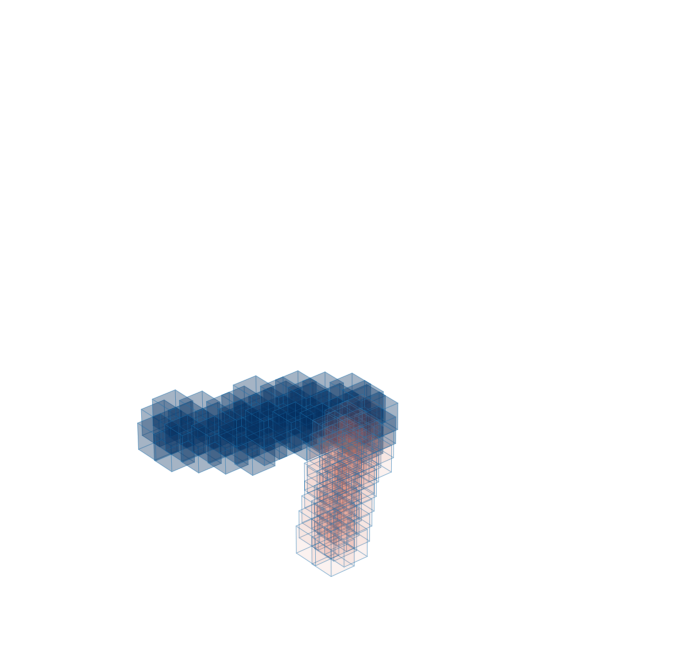

In [35]:
fnames, abs_paths = get_fnames_and_abspath_from_dir(CUBE_NPY_DIR)

# fetch first tiff
test_npy = abs_paths[0]
print("test file: ", test_npy)

# https://terbium.io/2017/12/matplotlib-3d/
import numpy as np
test_npy = np.load(test_npy)
test2 = np.flipud(200*np.copy(test_npy))  # *20 to make different color
voxels = test_npy | test2


import matplotlib

matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# # prepare some coordinates
# x, y, z = np.indices((8, 8, 8))

# # draw cuboids in the top left and bottom right corners, and a link between them
# cube1 = (x < 3) & (y < 3) & (z < 3)
# cube2 = (x >= 5) & (y >= 5) & (z >= 5)
# link = abs(x - y) + abs(y - z) + abs(z - x) <= 2
# #print(link)

# # combine the objects into a single boolean array
# voxels = cube1 | cube2 | link

# set the colors of each object
# colors = np.empty(voxels.shape, dtype=object)
# colors[link] = 'red'  # link overlaps with cubes, but we print cubes after to superimpose
# colors[cube1] = 'blue'
# colors[cube2] = 'green'

def normalize(arr):
    arr_min = np.min(arr)
    return (arr - arr_min) / (np.max(arr) - arr_min)


def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 2
    y[:, 1::2, :] += 2
    z[:, :, 1::2] += 2
    return x, y, z

def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3] * 2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded


def plot_cube(cube, angle=320):
    cube = normalize(cube)
    print(cube)

    facecolors = cm.RdBu(cube)
    # makes the alpha equal to the voxel value.
    facecolors[:, :, :, -1] = cube/5  # /20 to reduce alpha
    facecolors = explode(facecolors)

    filled = facecolors[:, :, :, -1] != 0
    x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    fig = plt.figure(figsize=(30 / 2.54, 30 / 2.54))
    ax = fig.gca(projection='3d')
    ax.axis('off')
    ax.view_init(30, angle)
    
    # static facecolor w some transparency: "#1f77b430"
    ax.voxels(x, y, z, filled, facecolors=facecolors, edgecolor='#1f77b430')
    plt.show()

IMG_DIM = 16
plot_cube(voxels)

# and plot everything
# ax.voxels(test_npy, edgecolor='k', alpha=0,
#         linewidth=0.5) # , facecolors=colors, 

#ax.set_alpha(0.5)

# plt.show()